In [1]:
import pandas as pd

# file downloaded from https://obis.org/data/access/ on 2022-07-10

file = "/Users/Mathew.Biddle/Desktop/obis_20220710.parquet"

This file is large, so we need to pre-subset the columns of interest. Then we can read it into memory.

In [2]:
columns = ['organismQuantity', 'organismQuantityType','decimalLatitude','decimalLongitude']

df = pd.read_parquet(file, engine="fastparquet", columns=columns)

Let's check the size of the monster:

In [3]:
df.shape

(105316746, 4)

Okay, let's filter out where `organismQuantityType` or `organismQuantity` don't have values. We need both to exist!

In [4]:
df_filtered = df[(df['organismQuantityType'].notna() | df['organismQuantity'].notna())]

df_filtered.shape

(27292364, 4)

Let's make a map of the points we have for some context.

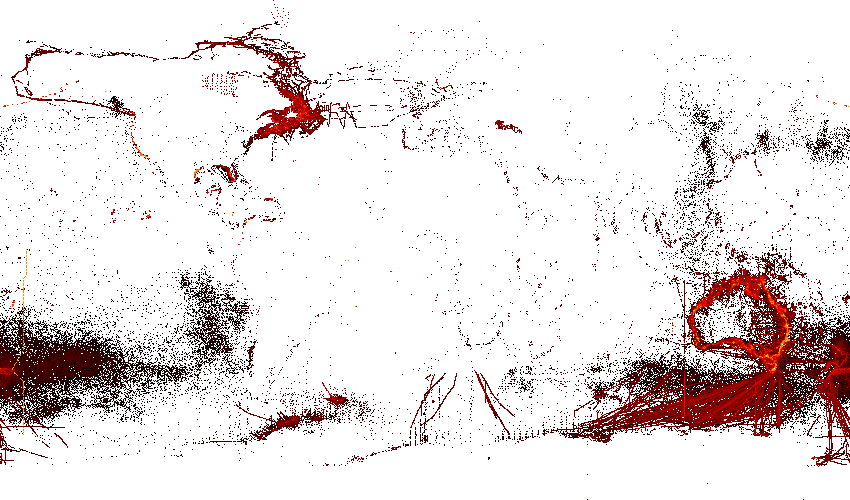

In [14]:
import datashader as ds
import colorcet
#df  = pd.read_csv('census.csv')
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(df_filtered, 'decimalLongitude', 'decimalLatitude')
img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how='log'), "white")

img